In [32]:
import os
import sys
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn import tree
from sklearn.cluster import KMeans

In [33]:
#checking file path
filename = ('./UN.csv')
os.path.exists(filename)

True

In [34]:
#Reading of the data from the file
UN_DATA = pd.read_csv(filename)

In [35]:
# we have 14 columns and 207 rows
UN_DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 206
Data columns (total 14 columns):
country                   207 non-null object
region                    207 non-null object
tfr                       197 non-null float64
contraception             144 non-null float64
educationMale             76 non-null float64
educationFemale           76 non-null float64
lifeMale                  196 non-null float64
lifeFemale                196 non-null float64
infantMortality           201 non-null float64
GDPperCapita              197 non-null float64
economicActivityMale      165 non-null float64
economicActivityFemale    165 non-null float64
illiteracyMale            160 non-null float64
illiteracyFemale          160 non-null float64
dtypes: float64(12), object(2)

In [36]:
print('Individual columns - Python data types')
[(x, type(UN_DATA[x][0])) for x in UN_DATA.columns] 

Individual columns - Python data types


[('country', str),
 ('region', str),
 ('tfr', numpy.float64),
 ('contraception', numpy.float64),
 ('educationMale', numpy.float64),
 ('educationFemale', numpy.float64),
 ('lifeMale', numpy.float64),
 ('lifeFemale', numpy.float64),
 ('infantMortality', numpy.float64),
 ('GDPperCapita', numpy.float64),
 ('economicActivityMale', numpy.float64),
 ('economicActivityFemale', numpy.float64),
 ('illiteracyMale', numpy.float64),
 ('illiteracyFemale', numpy.float64)]

In [37]:
#command to drop some feature with missing datas
UN_DATA1 = UN_DATA.drop(['contraception','educationMale', 'educationFemale', 'economicActivityMale', 'economicActivityFemale', 'illiteracyMale','illiteracyFemale'], axis=1)
UN_DATA1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 206
Data columns (total 7 columns):
country            207 non-null object
region             207 non-null object
tfr                197 non-null float64
lifeMale           196 non-null float64
lifeFemale         196 non-null float64
infantMortality    201 non-null float64
GDPperCapita       197 non-null float64
dtypes: float64(5), object(2)

In [38]:
#to filter some countries with blank space by removing some rows
UN_DATA1 = UN_DATA1.dropna(subset=['tfr','lifeMale','lifeFemale','infantMortality','GDPperCapita'])

In [39]:
UN_DATA1.info()
UN_DATA1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 206
Data columns (total 7 columns):
country            188 non-null object
region             188 non-null object
tfr                188 non-null float64
lifeMale           188 non-null float64
lifeFemale         188 non-null float64
infantMortality    188 non-null float64
GDPperCapita       188 non-null float64
dtypes: float64(5), object(2)

,country,region,tfr,lifeMale,lifeFemale,infantMortality,GDPperCapita
0,Afghanistan,Asia,6.90,45.0,46.0,154,2848
1,Albania,Europe,2.60,68.0,74.0,32,863
2,Algeria,Africa,3.81,67.5,70.3,44,1531
5,Angola,Africa,6.69,44.9,48.1,124,355
7,Argentina,America,2.62,69.6,76.8,22,8055
8,Armenia,Europe,1.70,67.2,74.0,25,354
9,Australia,Oceania,1.89,75.4,81.2,6,20046
10,Austria,Europe,1.42,73.7,80.1,6,29006
11,Azerbaijan,Asia,2.30,66.5,74.5,33,321
12,Bahamas,America,1.95,70.5,77.1,14,12545


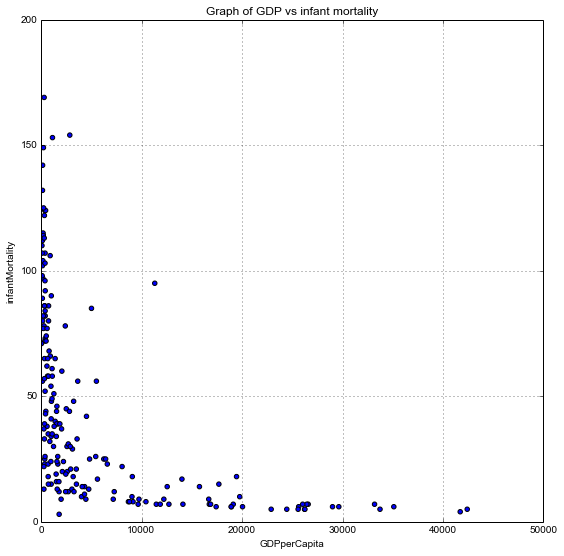

In [46]:
#plot and analyse GDP vsinfant mortality
%matplotlib inline
x = UN_DATA1['GDPperCapita'].values
y = UN_DATA1['infantMortality'].values
plt.figure(figsize=(9,9))
plt.xlim(0.0,50000)
plt.ylim(0.0,200)
plt.xlabel('GDPperCapita')
plt.ylabel('infantMortality')
plt.grid()
plt.legend()
plt.scatter(x,y)
plt.title('Graph of GDP vs infant mortality')

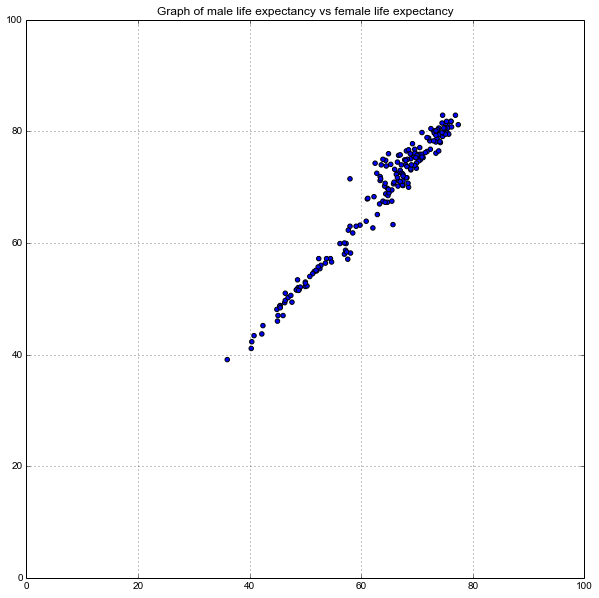

In [41]:
%matplotlib inline
x = UN_DATA1['lifeMale'].values
y = UN_DATA1['lifeFemale'].values
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.xlim(0,100)
plt.ylim(0,100)
plt.grid() 
plt.title('Graph of male life expectancy vs female life expectancy ')


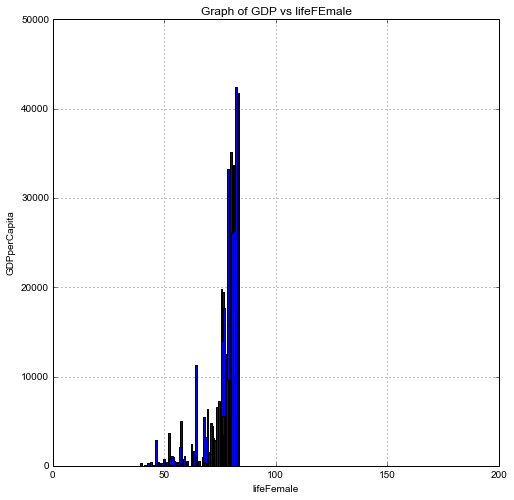

In [56]:
#plot and analyse lifeFemale vs GDP
#This graph shows that we have high GDP and a lower  infant mortality
%matplotlib inline
x = UN_DATA1['lifeFemale'].values
y = UN_DATA1['GDPperCapita'].values
plt.figure(figsize=(8,8))
plt.xlim(0.0,200)
plt.ylim(0.0,50000)
plt.xlabel('lifeFemale')
plt.ylabel('GDPperCapita')
plt.grid()
plt.bar(x,y)
plt.title('Graph of GDP vs lifeFEmale')

In [57]:
#To run an algorithm i need to remove the features with letter, just need to be left with numerics features
UN_DATA2 = UN_DATA1.drop(['country','region'], axis=1)

In [44]:
#i dropped country and region
UN_DATA2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 206
Data columns (total 5 columns):
tfr                188 non-null float64
lifeMale           188 non-null float64
lifeFemale         188 non-null float64
infantMortality    188 non-null float64
GDPperCapita       188 non-null float64
dtypes: float64(5)

In [51]:
#or running a machine learning algorithm(kmean)
test = UN_DATA2.values

In [52]:
from sklearn.cluster import KMeans

In [53]:
kmeans=KMeans(n_clusters=5, init='random',max_iter=600).fit(test)

In [54]:
%matplotlib inline
import pylab as pl
from itertools import cycle
def plot_2D(data, target, target_names):
    colors = cycle('bgrck')
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        pl.scatter(data[target == i, 0], data[target == i, 1],
        c=c, label=label)
    pl.legend()

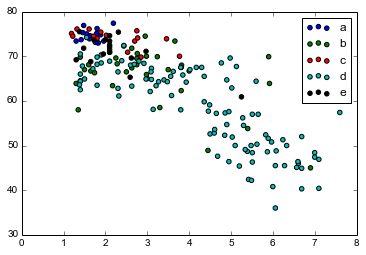

In [27]:
plot_2D(test, kmeans.labels_, ["a", "b", "c","d","e"])